The goal for this notebook will be two double-panel plots

1. A double-panel plot with percent error curves on the left, squared error curves on the right

2. A double-panel plot with median percent error histogram on the left, median squared error curves on the right

In [104]:
# First, load the emulator of choice
from cassL import train_emu as te
import numpy as np
import matplotlib.pyplot as plt

In [105]:
experiment = "Minimum Separation"

if experiment=="N_k":
    emu_experiments = ["Hnu2_100scales", "Hnu2_200scales", "Hnu2direct", "Hnu2_400scales", "Hnu2_500scales"]
    plot_labels = ["100", "200", "300", "400", "500"]
    file_name = experiment

elif experiment=="N_s":
    emu_experiments = ["Hnu2_3000samples", "Hnu2_4000samples", "Hnu2direct", "Hnu2__6000samples", "Hnu2__7000samples"]
    plot_labels = ["3000", "4000", "5000", "6000", "7000"]
    file_name = experiment

elif experiment=="Minimum Separation":
    emu_experiments = ["Hnu2_worst_minsep", "Hnu2_lowmed_minsep", "Hnu2_highmed_minsep", "Hnu2direct"]
    plot_labels = ["s^*_1", "s^*_2", "s^*_3", "s^*_4"]
    file_name = "minsep"

#colors = ["blue", "orange", "black", "red", "green"]
colors = ["blue", "orange", "red", "black"]

In [106]:
deltas = []
percerr = []
delta_meds = []
percerr_meds = []

for emu_name in emu_experiments:
    next_deltas = np.load("../../cassL/thesis_deltas/" + emu_name + ".npy")
    next_percerr = np.load("../../cassL/thesis_percents/" + emu_name + ".npy")
    next_abspercerr = np.abs(next_percerr)
    
    deltas.append(next_deltas)
    percerr.append(next_percerr)
    
    delta_meds.append(np.median(next_deltas, axis=1))
    percerr_meds.append(np.median(next_percerr, axis=1))

    print(emu_name)
    print("Average of median unsigned percent error:", np.mean(next_abspercerr))
    print("Standard deviation of unsigned percent error:", np.std(next_abspercerr))

Hnu2_worst_minsep
Average of median unsigned percent error: 0.004071771882515197
Standard deviation of unsigned percent error: 0.006243695493108874
Hnu2_lowmed_minsep
Average of median unsigned percent error: 0.004006149735668854
Standard deviation of unsigned percent error: 0.006188904638231021
Hnu2_highmed_minsep
Average of median unsigned percent error: 0.004113195179391969
Standard deviation of unsigned percent error: 0.005822571777002749
Hnu2direct
Average of median unsigned percent error: 0.004070142751947956
Standard deviation of unsigned percent error: 0.006160617888233135


In [107]:
deltas[0]

array([[-1.13932166e-02, -1.19017052e-02, -1.23553963e-02, ...,
        -7.71488355e-06, -6.96917549e-06, -6.33911862e-06],
       [-3.79819486e-03, -3.95584466e-03, -4.09765668e-03, ...,
         2.56877285e-06,  2.32145253e-06,  2.09089043e-06],
       [ 2.56394508e-03,  2.63351685e-03,  2.70520297e-03, ...,
        -6.14669551e-07, -5.51822116e-07, -5.01628156e-07],
       ...,
       [-9.97531040e-02, -1.03331914e-01, -1.07230287e-01, ...,
        -1.46418922e-05, -1.31657463e-05, -1.19984739e-05],
       [-5.33399290e-03, -5.53430305e-03, -5.73633603e-03, ...,
        -1.86530471e-07, -1.73275490e-07, -1.63971601e-07],
       [-8.24787096e-03, -8.56190021e-03, -8.88819615e-03, ...,
         1.22832426e-05,  1.11166735e-05,  1.00423327e-05]])

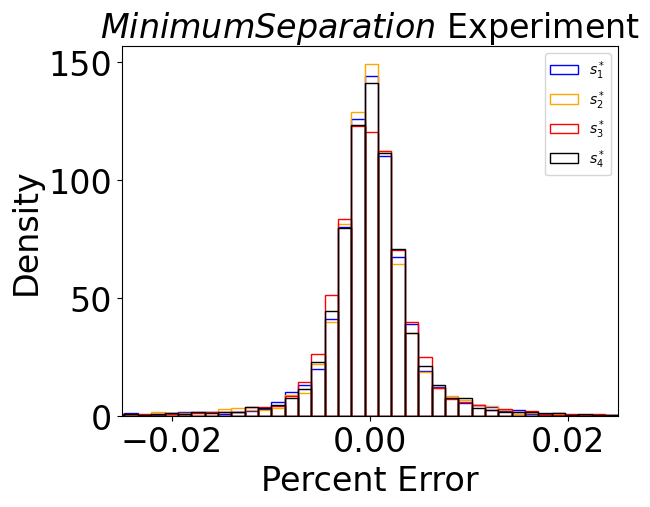

In [111]:
fig = plt.figure()
ax = fig.gca()

first_bins = None
alpha = 0.8

transparency=(.00, .00, .00, 0)

#ax.hist(percerr_meds[0], alpha=0.2, bins=200)
for i in range(len(emu_experiments)):
    if i == 0:
        counts, first_bins, patches = ax.hist(percerr_meds[i], bins=150, edgecolor=colors[i], facecolor=transparency, color="white",
            density=True, label="$" + plot_labels[i] + "$")
    else:
        ax.hist(percerr_meds[i], bins=first_bins, edgecolor=colors[i], color="white", facecolor=transparency,
            density=True, label="$" + plot_labels[i] + "$")

ax.set_xlim((-0.025, 0.025))
ax.tick_params(labelsize=24)

ax.legend()

ax.set_title("$" + experiment + "$ Experiment", fontsize=24)
ax.set_xlabel("Percent Error", fontsize=24)
ax.set_ylabel("Density", fontsize=24)
plt.savefig("../../thesis_paper/res/error_on_emulators/percents-hist-" + file_name + ".png", bbox_inches="tight")

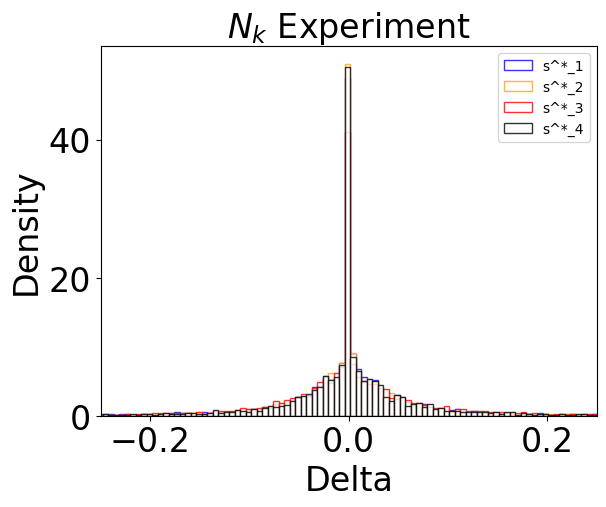

In [109]:
fig = plt.figure()
ax = fig.gca()

first_bins = None
alpha = 0.8

for i in range(len(emu_experiments)):
    if i == 0:
        counts, first_bins, patches = ax.hist(delta_meds[i], alpha=alpha, bins=500, edgecolor=colors[i], color="white",
            density=True, label=plot_labels[i])
    else:
        ax.hist(delta_meds[i], alpha=alpha, bins=first_bins, edgecolor=colors[i], color="white",
            density=True, label=plot_labels[i])

ax.set_xlim((-0.25, 0.25))
ax.tick_params(labelsize=24)

ax.legend()

ax.set_title("$N_k$ Experiment", fontsize=24)
ax.set_xlabel("Delta", fontsize=24)
ax.set_ylabel("Density", fontsize=24)
plt.savefig("../../thesis_paper/res/error_on_emulators/deltas-hist-" + experiment + ".png", bbox_inches="tight")

NameError: name 'square_errors' is not defined

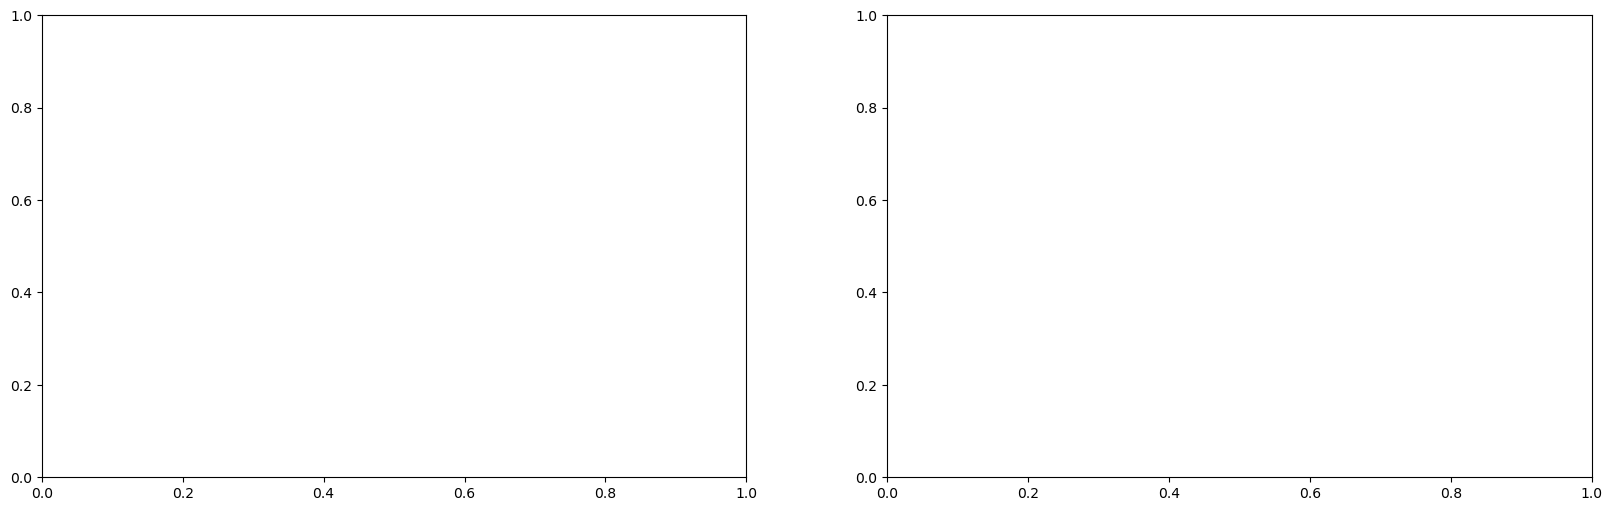

In [110]:
fig, axs = plt.subplots(1, 2, sharex="row", figsize=(20,6))

for i in range(len(square_errors)):
    axs[0].loglog(k_axis, square_errors[i], alpha=0.05)
    axs[1].plot(k_axis, percent_errors[i], alpha=0.05)

axs[0].tick_params(labelsize=24)    
    
#axs[0].set_title("Default Massive Emulator", fontsize=24)
axs[0].set_xlabel("$k$ [1 / Mpc]", fontsize=24)
axs[0].set_ylabel("Squared Error", fontsize=24)    
    
axs[1].set_xscale('log')

axs[1].tick_params(labelsize=24)

#axs[1].set_title("Default Massive Emulator", fontsize=24)
axs[1].set_xlabel("$k$ [1 / Mpc]", fontsize=24)
axs[1].set_ylabel("Percent Error", fontsize=24)

plt.savefig("emu_test.png", bbox_inches="tight")